## 4.5. 자료를 이용한 예제 

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

pop = pandas.read_csv("ames.csv")
pop.head(4)

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000


### 예제 1

- 히스토그램은 `matplotlib.pyplot` 모듈의 `hist`함수를 이용하여 그렸다.
- 수치적 요약으로 중심위치에 대해서는 평균과 중앙값을, 산포에 대해서는 분산과 표준편차를 계산하였다. 모평균은 약 180796.06, 모표준편차는 약 79886.69로 계산된다
- 모집단의 분포는 **오른쪽으로 긴 꼬리를 가지는(Right-skewed)** 왜도가 양수인 분포이다.

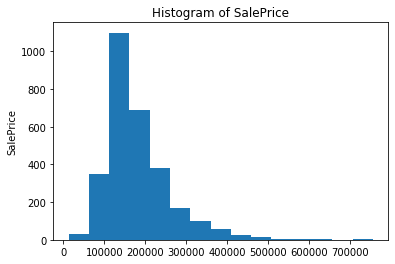

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64
var	6379705498.413448


In [11]:
# 히스토그램
plt.hist(pop['SalePrice'], bins = 15, color = "C0", histtype = 'bar')
plt.title("Histogram of SalePrice")
plt.ylabel("frequency")
plt.ylabel("SalePrice")
plt.show()

# 수치적 요약
print( pop['SalePrice'].describe() )

mean = np.mean(pop['SalePrice'])
std = np.std(pop['SalePrice'])

# describe() 함수를 쓰지 않는 경우 아래와 같은 코드를 사용하는 것도 가능하다.
# print("평균", mean)
# print("중앙값", np.median(pop['SalePrice']))
print("var\t" + str(np.var(pop['SalePrice'])))
# print("표준편차", std)

### 예제 2
* 모평균의 추정값은 **표본평균**이다. 아래 표본에서 계산한 표본평균, 즉 모평균의 추정값은 **185113.3**이다.

In [12]:
np.random.seed(1)

n = 50

sample = pop['SalePrice'].sample(n)
print( sample.mean() )

185113.3


### 예제 3

표본평균의 분포는 **좌우대칭 종모양의 정규분포에 근사**한다. 이는 중심극한정리와 일관되는 결과이다.


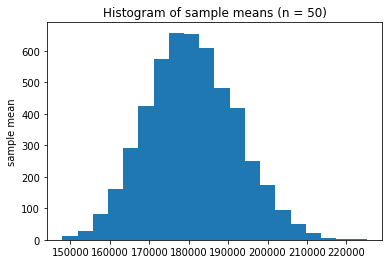

In [13]:
sample_mean50 = []

for _ in range(5000):
    sample = pop['SalePrice'].sample(n)
    sample_mean50.append( sample.mean() )

plt.hist(sample_mean50, bins = 20, color = "C0", histtype = 'bar')
plt.title("Histogram of sample means (n = 50)")
plt.ylabel("frequency")
plt.ylabel("sample mean")
plt.show()

### 예제 4

* 표본평균의 평균은 약 180806.79로, 모평균 180796.06와 유사한 값이다. n이 무한대로 갈 때, 표본평균의 평균은 모평균과 같아진다.
* 표본평균의 분산은 약 128895736.19으로, 모분산 6379705498.41을 표본의 크기(n)인 50으로 나눈 127594109.97과 유사한 값이다.
* **이는 표본평균의 평균이 모평균(`μ`)에 근사하며, 표본평균의 분산은 모분산을 표본의 크기로 나눈 값(`σ^2/n`)에 근사함을 보여준다.**
* 예제 3에서의 답변을 종합하여 정리하면 표본평균의 분포는 `μ`를 평균, `σ^2/n`정규분포 `N(μ, σ^2/n)`에 근사한다.

In [14]:
print( np.mean(sample_mean50) )
print( np.var(sample_mean50, ddof = 1) ) # or 

180804.551812
128927219.58197807


### 예제 5

* n이 50일 때에 비해 n이 150일 때, 그래프의 폭이 더 좁고 모평균 근처에 좀더 몰려 있다. 이를 통해 **표본의 크기(n)가 클수록 표본평균의 분산이 작아짐**을 알 수 있다.

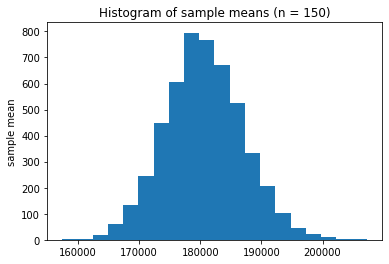

In [15]:
n = 150
sample_mean150 = []

for _ in range(5000):
    sample = pop['SalePrice'].sample(n)
    sample_mean150.append( sample.mean() )

plt.hist(sample_mean150, bins = 20, color = "C0", histtype = 'bar')
plt.title("Histogram of sample means (n = 150)")
plt.ylabel("frequency")
plt.ylabel("sample mean")
plt.show()